In [1]:
import pandas as pd
import datetime as dt
!pip install --upgrade pandas-datareader
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

def read_data(indices_list,
          start=dt.datetime(1900, 1, 2),
          end=dt.datetime(2020, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    df = pd.DataFrame()
    for ind in indices_list:
        prices = data.DataReader(ind, 'yahoo', start, end)
        closing_prices = prices['Close']
        df[ind] = closing_prices

    return df

df = read_data(indices_list)
df

Requirement already up-to-date: pandas-datareader in /Users/mike_stein612/opt/anaconda3/lib/python3.8/site-packages (0.9.0)


,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1927-12-30,17.660000,NaN,NaN,NaN
1928-01-03,17.760000,NaN,NaN,NaN
1928-01-04,17.719999,NaN,NaN,NaN
1928-01-05,17.549999,NaN,NaN,NaN
1928-01-06,17.660000,NaN,NaN,NaN
...,...,...,...,...
2020-12-01,3662.449951,12355.110352,29823.919922,26787.539062
2020-12-02,3669.010010,12349.370117,29883.789062,26800.980469
2020-12-03,3666.719971,12377.179688,29969.519531,26809.369141


In [3]:
df2 = df.groupby(df.index.year).mean()
df2

,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1927,17.660000,NaN,NaN,NaN
1928,19.937200,NaN,NaN,NaN
1929,26.123936,NaN,NaN,NaN
1930,21.033626,NaN,NaN,NaN
1931,13.631071,NaN,NaN,NaN
...,...,...,...,...
2016,2094.651264,4987.792947,17927.107348,16911.072958
2017,2449.076379,6235.298914,21750.203748,20229.560596
2018,2746.214183,7425.957811,25053.949997,22328.185135


In [4]:
df3 = df2.pct_change()
df3

,^GSPC,^IXIC,^DJI,^N225
Date,,,,
1927,NaN,NaN,NaN,NaN
1928,0.128947,NaN,NaN,NaN
1929,0.310311,NaN,NaN,NaN
1930,-0.194852,NaN,NaN,NaN
1931,-0.351939,NaN,NaN,NaN
...,...,...,...,...
2016,0.016294,0.008541,0.019333,-0.119708
2017,0.169205,0.250112,0.213258,0.196232
2018,0.121326,0.190955,0.151895,0.103740


In [5]:
df.columns

Index(['^GSPC', '^IXIC', '^DJI', '^N225'], dtype='object')

Text(0, 0.5, 'Percent Change')

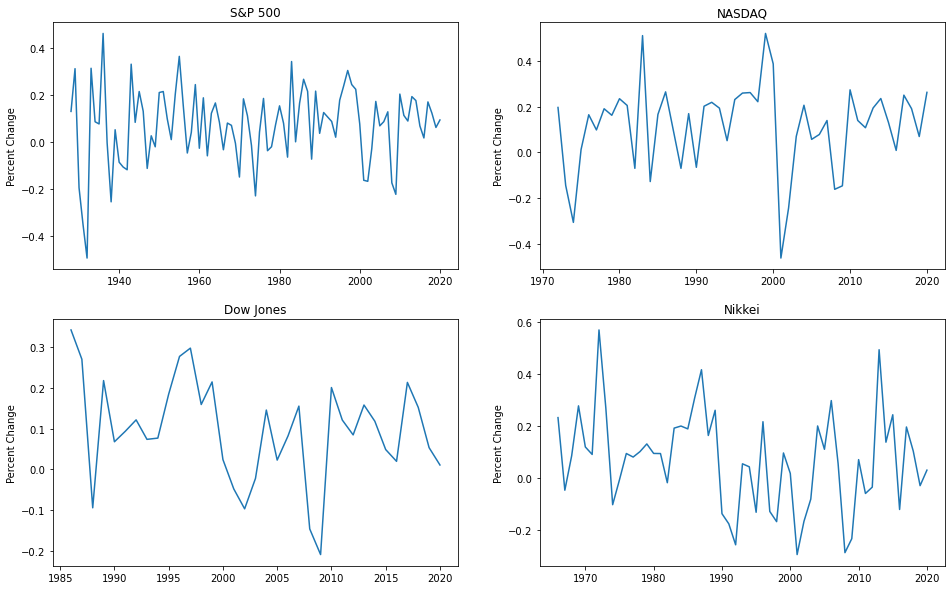

In [6]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))
ax[0][0].plot(df3['^GSPC'])
ax[0][0].set(title = 'S&P 500')
ax[0][0].set_ylabel('Percent Change')

ax[0][1].plot(df3['^IXIC'])
ax[0][1].set(title = 'NASDAQ')
ax[0][1].set_ylabel('Percent Change')

ax[1][0].plot(df3['^DJI'])
ax[1][0].set(title = 'Dow Jones')
ax[1][0].set_ylabel('Percent Change')

ax[1][1].plot(df3['^N225'])
ax[1][1].set(title = 'Nikkei')
ax[1][1].set_ylabel('Percent Change')
#df3.plot()